<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Effect-of-GDP-on-life-expectancy" data-toc-modified-id="Effect-of-GDP-on-life-expectancy-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Effect of GDP on life expectancy</a></span></li><li><span><a href="#Splitting-the-life-expectancy-into-quartiles" data-toc-modified-id="Splitting-the-life-expectancy-into-quartiles-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Splitting the life expectancy into quartiles</a></span><ul class="toc-item"><li><span><a href="#Visualising-the-distribution-of-life-expectancy" data-toc-modified-id="Visualising-the-distribution-of-life-expectancy-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Visualising the distribution of life expectancy</a></span></li></ul></li><li><span><a href="#Splitting-the-data-into-High-and-Low-GDP" data-toc-modified-id="Splitting-the-data-into-High-and-Low-GDP-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Splitting the data into High and Low GDP</a></span><ul class="toc-item"><li><span><a href="#Histogram-of-the-two-GDP-groups" data-toc-modified-id="Histogram-of-the-two-GDP-groups-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Histogram of the two GDP groups</a></span></li></ul></li></ul></div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Effect of GDP on life expectancy

This is a simple project that aims to visualise the effect of GDP on life expectancy using seaborn and matplotlib. The data is is an augmented version of the World Development Indicators Dataset available from the World Bank.

In [2]:
data = pd.read_csv("country_data.csv")
data.head()

,Country,Life Expectancy,GDP
0,Afghanistan,58.19375,340.015425
1,Albania,75.15625,2119.726679
2,Algeria,73.61875,2847.853392
3,Angola,49.01875,1975.143045
4,Antigua and Barbuda,75.05625,9759.305728


# Splitting the life expectancy into quartiles

In [3]:
life_expectancy = data['Life Expectancy']
life_expectancy_quartiles = np.quantile(life_expectancy, [0.25, 0.5, 0.75])
print(life_expectancy_quartiles)

[62.325     72.525     75.4421875]


## Visualising the distribution of life expectancy

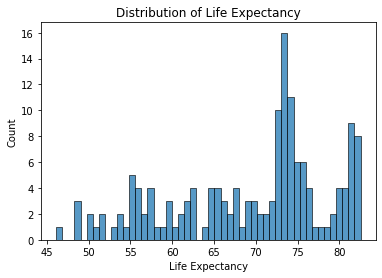

In [7]:
sns.histplot(life_expectancy, bins = 50).set_title('Distribution of Life Expectancy')
plt.show()

In [8]:
# comparing life expectancy betweem low_gdp countries and high_gdp countries
# select the GDP colum from the DataFrame:
gdp = data['GDP']
# the median GDP will be used to categorise the countries - either above or below the median
median_gdp = np.median(gdp)
print(median_gdp)

2938.0781152500003


# Splitting the data into High and Low GDP

The median GDP value will be used as the threshold. Above this a country will be classed as high GDP and below will be low GDP.

In [9]:
low_gdp = data[data['GDP'] <= median_gdp]
high_gdp = data[data['GDP'] >= median_gdp]

In [10]:
# find the quartiles of the "Life Expecancy" column of "low_gdp" and "high_gdp"
low_gdp_quartiles = np.quantile(low_gdp['Life Expectancy'], [0.25, 0.5, 0.75])
print(low_gdp_quartiles)
high_gdp_quartiles = np.quantile(high_gdp['Life Expectancy'], [0.25, 0.5, 0.75])
print(high_gdp_quartiles)

[56.3375  64.34375 71.7375 ]
[72.965625 75.15625  80.521875]


## Histogram of the two GDP groups

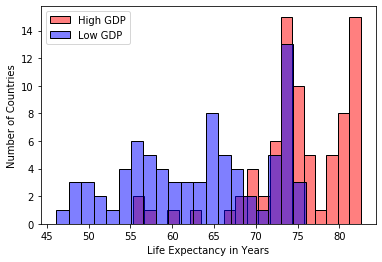

In [15]:
sns.histplot(high_gdp['Life Expectancy'], alpha = 0.5, label='High GDP', color='red', bins=20)
sns.histplot(low_gdp['Life Expectancy'], alpha = 0.5, label='Low GDP', color='blue', bins=20)
plt.xlabel('Life Expectancy in Years')
plt.ylabel('Number of Countries')
plt.legend()
plt.show()